# Movebank Data Analysis Attempt

## Part 1: Basic Manipulation

### Checking up the data and 1st Degree Clean-up: Identify the Useful Columns

After downloading the data, I found that the package came with two csv files. First, we can import the two tables - reference and Argos. To do so, we will have to import pandas (and numpy and matplotlib, for later use).

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

Read the reference table

In [2]:
whale_ref = pd.read_csv("../data/Blue_whales_reference.csv")
whale_ref.head()

,tag-id,animal-id,animal-taxon,deploy-on-date,deploy-off-date,animal-life-stage,animal-sex,attachment-type,deploy-on-latitude,deploy-on-longitude,deployment-id,manipulation-type,study-site,tag-manufacturer-name,tag-model,tag-readout-method
0,1993CA-ST6-10823,1993CA-Bmu-10823,Balaenoptera musculus,1993-08-28 18:20:00.000,1993-09-01 22:35:12.000,adult,,implant,37.012,-122.412,1993CA-10823,none,"Pt. Ano Nuevo, CA","Telonics, Inc",ST6,satellite
1,1993CA-ST6-10833,1993CA-Bmu-10833,Balaenoptera musculus,1993-08-28 18:54:00.000,1993-08-28 21:45:56.000,adult,,implant,37.022,-122.415,1993CA-10833,none,"Pt. Ano Nuevo, CA","Telonics, Inc",ST6,satellite
2,1993CA-ST6-00834,1993CA-Bmu-00834,Balaenoptera musculus,1993-08-29 01:13:00.000,1993-09-05 13:41:06.000,adult,,implant,37.058,-122.433,1993CA-00834,none,"Pt. Ano Nuevo, CA","Telonics, Inc",ST6,satellite
3,1993CA-ST6-10836,1993CA-Bmu-10836,Balaenoptera musculus,1993-08-31 23:40:00.000,1993-09-04 16:35:40.000,adult,,implant,37.198,-122.773,1993CA-10836,none,"Pigeon Point, CA","Telonics, Inc",ST6,satellite
4,1994CA-ST10-10821,1994CA-Bmu-10821,Balaenoptera musculus,1994-09-13 20:31:00.000,1994-09-14 00:23:34.000,adult,,implant,37.600,-123.000,1994CA-10821,none,"Farallon Islands, CA","Telonics, Inc",ST10,satellite


In [3]:
whale_ref.shape

(143, 16)

The reference table records the information of each blue whale monitore. It is of size 143 rows x 16 columns. Let's figure out what each column is about.

In [4]:
whale_ref.columns

Index(['tag-id', 'animal-id', 'animal-taxon', 'deploy-on-date',
       'deploy-off-date', 'animal-life-stage', 'animal-sex', 'attachment-type',
       'deploy-on-latitude', 'deploy-on-longitude', 'deployment-id',
       'manipulation-type', 'study-site', 'tag-manufacturer-name', 'tag-model',
       'tag-readout-method'],
      dtype='object')

Combined with the column information provided in the README.txt file, we can find a few columns that provide informations that will be useful to us 
- *amimal-id*: An individual identifier for the subjects monitored
- *deploy-on-date* & *deploy-off-date*: the start and end time of monitoring
- *deploy-on-latitude* & *deploy-on-longitutde*: the start location of monitoring
- *study-site*: name of deployment site/facility

Before we downsize the table to a more concise version, let's check if the some standard measures (i.e. other less interesting columns) are uniform for each subject recorded.

In [5]:
whale_ref.groupby(['animal-life-stage','animal-taxon','attachment-type',
                   'manipulation-type','tag-readout-method']).count()

,,,,,tag-id,animal-id,deploy-on-date,deploy-off-date,animal-sex,deploy-on-latitude,deploy-on-longitude,deployment-id,study-site,tag-manufacturer-name,tag-model
animal-life-stage,animal-taxon,attachment-type,manipulation-type,tag-readout-method,,,,,,,,,,,
adult,Balaenoptera musculus,implant,none,satellite,143,143,143,143,143,143,143,143,143,143,143


In [6]:
whale_ref.groupby(['tag-manufacturer-name','tag-model']).count()

tag-id  animal-id  animal-taxon  \
tag-manufacturer-name   tag-model                                    
Telonics, Inc           ST10           15         15            15   
                        ST15          109        109           109   
                        ST21            6          6             6   
                        ST6            12         12            12   
Wildlife Computers, Inc MK10            1          1             1   

                                   deploy-on-date  deploy-off-date  \
tag-manufacturer-name   tag-model                                    
Telonics, Inc           ST10                   15               15   
                        ST15                  109              109   
                        ST21                    6                6   
                        ST6                    12               12   
Wildlife Computers, Inc MK10                    1                1   

                                   animal-life-stage  animal-sex  \
tag-manufacturer-name   tag-model                                  
Telonics, Inc           ST10                      15          15   
                        ST15                     109         109   
                        ST21                       6           6   
                        ST6                       12          12   
Wildlife Computers, Inc MK10                       1           1   

                                   attachment-type  deploy-on-latitude  \
tag-manufacturer-name   tag-model                                        
Telonics, Inc           ST10                    15                  15   
                        ST15                   109                 109   
                        ST21                     6                   6   
                        ST6                     12                  12   
Wildlife Computers, Inc MK10                     1                   1   

                                   deploy-on-longitude  deployment-id  \
tag-manufacturer-name   tag-model                                       
Telonics, Inc           ST10                        15             15   
                        ST15                       109            109   
                        ST21                         6              6   
                        ST6                         12             12   
Wildlife Computers, Inc MK10                         1              1   

                                   manipulation-type  study-site  \
tag-manufacturer-name   tag-model                                  
Telonics, Inc           ST10                      15          15   
                        ST15                     109         109   
                        ST21                       6           6   
                        ST6                       12          12   
Wildlife Computers, Inc MK10                       1           1   

                                   tag-readout-method  
tag-manufacturer-name   tag-model                      
Telonics, Inc           ST10                       15  
                        ST15                      109  
                        ST21                        6  
                        ST6                        12  
Wildlife Computers, Inc MK10                        1

Although most of the housekeeping columns have only one entry for all the rows (subjects), __the tag-model used for each subject is not exactly the same__ - most of which are ST15, and a few are of a slightly different model. __Will this create some problem for the data collected?__ We will find out later!

Now let's clean up our reference table for further use. 

In [7]:
whale_ref_clean = whale_ref[["animal-id","deploy-on-date","deploy-off-date",
                             "deploy-on-latitude","deploy-on-longitude","study-site",
                             "tag-manufacturer-name","tag-model"]]
whale_ref_clean.head(3)

,animal-id,deploy-on-date,deploy-off-date,deploy-on-latitude,deploy-on-longitude,study-site,tag-manufacturer-name,tag-model
0,1993CA-Bmu-10823,1993-08-28 18:20:00.000,1993-09-01 22:35:12.000,37.012,-122.412,"Pt. Ano Nuevo, CA","Telonics, Inc",ST6
1,1993CA-Bmu-10833,1993-08-28 18:54:00.000,1993-08-28 21:45:56.000,37.022,-122.415,"Pt. Ano Nuevo, CA","Telonics, Inc",ST6
2,1993CA-Bmu-00834,1993-08-29 01:13:00.000,1993-09-05 13:41:06.000,37.058,-122.433,"Pt. Ano Nuevo, CA","Telonics, Inc",ST6


Now let's move on to the juicer table! Repeat the same procedure done to the reference table.

In [8]:
whale_data = pd.read_csv("../data/Blue_whales_Argos.csv")
whale_data.head(3)

,event-id,visible,timestamp,location-long,location-lat,argos:best-level,argos:calcul-freq,argos:iq,argos:lat1,argos:lat2,...,argos:lon1,argos:lon2,argos:nb-mes,argos:nb-mes-120,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,9018011221,True,1993-08-29 01:13:00.000,-122.433,37.058,NaN,NaN,NaN,37.058,NaN,...,-122.433,NaN,NaN,NaN,NaN,gps,Balaenoptera musculus,1993CA-ST6-00834,1993CA-Bmu-00834,Blue whales Eastern North Pacific 1993-2008 - ...
1,9018011222,True,1993-08-28 18:20:00.000,-122.412,37.012,NaN,NaN,NaN,37.012,NaN,...,-122.412,NaN,NaN,NaN,NaN,gps,Balaenoptera musculus,1993CA-ST6-10823,1993CA-Bmu-10823,Blue whales Eastern North Pacific 1993-2008 - ...
2,9018011223,True,1993-08-28 18:54:00.000,-122.415,37.022,NaN,NaN,NaN,37.022,NaN,...,-122.415,NaN,NaN,NaN,NaN,gps,Balaenoptera musculus,1993CA-ST6-10833,1993CA-Bmu-10833,Blue whales Eastern North Pacific 1993-2008 - ...


In [9]:
whale_data.shape

(16249, 21)

In [10]:
whale_data.columns

Index(['event-id', 'visible', 'timestamp', 'location-long', 'location-lat',
       'argos:best-level', 'argos:calcul-freq', 'argos:iq', 'argos:lat1',
       'argos:lat2', 'argos:lc', 'argos:lon1', 'argos:lon2', 'argos:nb-mes',
       'argos:nb-mes-120', 'manually-marked-outlier', 'sensor-type',
       'individual-taxon-canonical-name', 'tag-local-identifier',
       'individual-local-identifier', 'study-name'],
      dtype='object')

Combined with the column information provided in the README.txt file, we can find a few columns that provide informations that will be useful to us 
- *timestamp*: The time point that a sensory measurement was taken
- *locaetion-long* & *location-lat*: the start location of monitoring
- *individual-local-identifier*: same as "animal-id" in reference table
- *manually-marked-outlier*: marked TRUE if "visible" marked FALSE

Some other technical measure associated with satellite signal receiving process that may be helpful for us to measure/visualize the credulity of data: 
- *argos:best-level*: Best signal strength
- *argos:calcul-freq*: Calculated frequency
- *argos:iq*: indicates transmitter oscillator frequency drift between two satellite passe
- *argos:nb-mes-120*: The number of messages received by the satellite at a signal strength greater than -120 decibels
- *sensor-type*: type of tracking sensor used (also appeared in reference table)



After identifying what we need and do not need, let us do some clean up and re-naming.

In [11]:
whale_data_clean = whale_data[['individual-local-identifier','timestamp','location-lat', 
                               'location-long', 'manually-marked-outlier','argos:best-level', 
                               'argos:calcul-freq', 'argos:iq','argos:nb-mes',
                               'argos:nb-mes-120', 'sensor-type']]
whale_data_clean.columns = ['animal-id','timestamp','location-lat', 'location-long', 
                               'outlier','argos:best-level', 'argos:calcul-freq', 'argos:iq',
                               'argos:no-mes-rec','argos:no-mes-rec-120', 'sensor-type']
whale_data_clean.head()

,animal-id,timestamp,location-lat,location-long,outlier,argos:best-level,argos:calcul-freq,argos:iq,argos:no-mes-rec,argos:no-mes-rec-120,sensor-type
0,1993CA-Bmu-00834,1993-08-29 01:13:00.000,37.058,-122.433,NaN,NaN,NaN,NaN,NaN,NaN,gps
1,1993CA-Bmu-10823,1993-08-28 18:20:00.000,37.012,-122.412,NaN,NaN,NaN,NaN,NaN,NaN,gps
2,1993CA-Bmu-10833,1993-08-28 18:54:00.000,37.022,-122.415,NaN,NaN,NaN,NaN,NaN,NaN,gps
3,1993CA-Bmu-10836,1993-08-31 23:40:00.000,37.198,-122.773,NaN,NaN,NaN,NaN,NaN,NaN,gps
4,1994CA-Bmu-10820,1994-09-13 21:28:00.000,37.687,-123.102,NaN,NaN,NaN,NaN,NaN,NaN,gps


After cleaning up the two tables, let's do some basic grouping and counting using __`pd.groupby`__. This allows us to understands the values in some of the parameters.

In [12]:
whale_ref_clean.groupby('study-site').count()

,animal-id,deploy-on-date,deploy-off-date,deploy-on-latitude,deploy-on-longitude,tag-manufacturer-name,tag-model
study-site,,,,,,,
"Carmel, CA",3,3,3,3,3,3,3
"Costa Rica Dome, Eastern Pacific",2,2,2,2,2,2,2
"Farallon Islands, CA",20,20,20,20,20,20,20
"Half Moon Bay, CA",7,7,7,7,7,7,7
"La Paz, BCS, Mexico",2,2,2,2,2,2,2
"Lopez Point, CA",1,1,1,1,1,1,1
"Loreto, BCS, Mexico",1,1,1,1,1,1,1
"Monterrey Bay, CA",9,9,9,9,9,9,9
"Offshore, Pigeon Point, CA",1,1,1,1,1,1,1


In [13]:
whale_data_clean.groupby('outlier').count()

,animal-id,timestamp,location-lat,location-long,argos:best-level,argos:calcul-freq,argos:iq,argos:no-mes-rec,argos:no-mes-rec-120,sensor-type
outlier,,,,,,,,,,
True,471,471,471,471,465,465,429,468,465,471


__Outlier__: There are 471 out of 16249 records marked as outlier.

In [14]:
whale_data_clean.groupby(['sensor-type']).count()

,animal-id,timestamp,location-lat,location-long,outlier,argos:best-level,argos:calcul-freq,argos:iq,argos:no-mes-rec,argos:no-mes-rec-120
sensor-type,,,,,,,,,,
argos-doppler-shift,16106,16106,16106,16106,471,15941,15910,15424,16021,15910
gps,143,143,143,143,0,0,0,0,0,0


__sensor-type__: most of the data were recorded using argos-doppler-shift method

### 2nd-Degree Clean-up: Marking and Erasing the Outliers

Reading more closely into the reference table, I noticed that there are some individuals who were deployed on the tracker very shortly before they were taken off. It is best to leave these individuals out of the focus of our attention. <br>
Therefore, I decided to make a column that marks the how long the tracker was planted on each individuals. To do this, I need to make some changes of the data type first.

In [15]:
whale_ref_clean.dtypes

animal-id                 object
deploy-on-date            object
deploy-off-date           object
deploy-on-latitude       float64
deploy-on-longitude      float64
study-site                object
tag-manufacturer-name     object
tag-model                 object
dtype: object

Note that __`deploy-on-date`__ and __`deploy-off-date`__ are of type __`object`__. We need to change them into type __`datetime`__ using function __`pd.to_datetime()`__.

In [16]:
whale_ref_clean['deploy-on-date'] = pd.to_datetime(whale_ref_clean['deploy-on-date'])
whale_ref_clean['deploy-off-date'] = pd.to_datetime(whale_ref_clean['deploy-off-date'])
whale_ref_clean.dtypes

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


animal-id                        object
deploy-on-date           datetime64[ns]
deploy-off-date          datetime64[ns]
deploy-on-latitude              float64
deploy-on-longitude             float64
study-site                       object
tag-manufacturer-name            object
tag-model                        object
dtype: object

In [17]:
whale_ref_clean.insert(3,'monitor-duration', 
                       whale_ref_clean['deploy-off-date'] 
                        - whale_ref_clean['deploy-on-date'])
whale_ref_clean.head(3)

,animal-id,deploy-on-date,deploy-off-date,monitor-duration,deploy-on-latitude,deploy-on-longitude,study-site,tag-manufacturer-name,tag-model
0,1993CA-Bmu-10823,1993-08-28 18:20:00,1993-09-01 22:35:12,4 days 04:15:12,37.012,-122.412,"Pt. Ano Nuevo, CA","Telonics, Inc",ST6
1,1993CA-Bmu-10833,1993-08-28 18:54:00,1993-08-28 21:45:56,0 days 02:51:56,37.022,-122.415,"Pt. Ano Nuevo, CA","Telonics, Inc",ST6
2,1993CA-Bmu-00834,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,37.058,-122.433,"Pt. Ano Nuevo, CA","Telonics, Inc",ST6


In [18]:
whale_ref_clean.dtypes

animal-id                         object
deploy-on-date            datetime64[ns]
deploy-off-date           datetime64[ns]
monitor-duration         timedelta64[ns]
deploy-on-latitude               float64
deploy-on-longitude              float64
study-site                        object
tag-manufacturer-name             object
tag-model                         object
dtype: object

Now that we have added column named __`monitor-duration`__, we can easily sort the reference table with respect to this characteristic.

In [19]:
whale_ref_clean.sort_values('monitor-duration')

,animal-id,deploy-on-date,deploy-off-date,monitor-duration,deploy-on-latitude,deploy-on-longitude,study-site,tag-manufacturer-name,tag-model
104,2006CA-Bmu-00825,2006-09-12 22:33:00,2006-09-13 00:51:40,0 days 02:18:40,34.056,-120.598,"San Miguel Island, CA","Telonics, Inc",ST15
1,1993CA-Bmu-10833,1993-08-28 18:54:00,1993-08-28 21:45:56,0 days 02:51:56,37.022,-122.415,"Pt. Ano Nuevo, CA","Telonics, Inc",ST6
4,1994CA-Bmu-10821,1994-09-13 20:31:00,1994-09-14 00:23:34,0 days 03:52:34,37.600,-123.000,"Farallon Islands, CA","Telonics, Inc",ST10
8,1994CA-Bmu-10824,1994-09-14 22:00:00,1994-09-15 04:03:58,0 days 06:03:58,37.745,-123.125,"Farallon Islands, CA","Telonics, Inc",ST10
127,2007CA-Bmu-00827,2007-09-09 20:51:00,2007-09-10 05:35:10,0 days 08:44:10,34.122,-120.048,"Santa Barbara Channel, CA","Wildlife Computers, Inc",MK10
19,1995CA-Bmu-23037,1995-09-11 18:06:00,1995-09-12 03:04:20,0 days 08:58:20,34.115,-120.084,"Santa Barbara Channel, CA","Telonics, Inc",ST10
6,1994CA-Bmu-10822,1994-09-13 22:35:00,1994-09-14 16:41:38,0 days 18:06:38,37.000,-123.400,"Offshore, Pigeon Point, CA","Telonics, Inc",ST10
32,1998CA-Bmu-01390,1998-08-28 22:04:00,1998-08-29 16:22:20,0 days 18:18:20,37.607,-123.054,"Farallon Islands, CA","Telonics, Inc",ST15
56,2000CA-Bmu-10823,2000-10-04 19:51:00,2000-10-05 15:23:29,0 days 19:32:29,37.620,-123.040,"Farallon Islands, CA","Telonics, Inc",ST15
12,1994CA-Bmu-23029,1994-10-07 17:27:00,1994-10-08 14:36:12,0 days 21:09:12,34.148,-119.938,"Santa Barbara Channel, CA","Telonics, Inc",ST6


From the sorted table above, we can see that the duration in which trackers were kept on a  blue whale range from 2 hours to 503 days! We would definitely remove the poor whales who only had the tracker on for a couple hours from our data :( Let's create a histogram to visualize the __`monitor-duration`__ column.

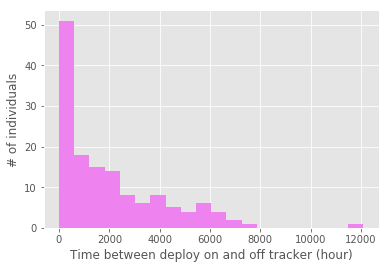

In [20]:
(whale_ref_clean['monitor-duration'] / pd.Timedelta(hours=1)).hist(bins = 20, color = 'violet')
plt.xlabel('Time between deploy on and off tracker (hour)')
plt.ylabel('# of individuals');

It seems like that there are more than __50__ out of __143__ whales who wore the tracker for less than 12500 / 20 = 625 hours (about a month). Now let's look more closely on the portion below 480 hours (20 days)

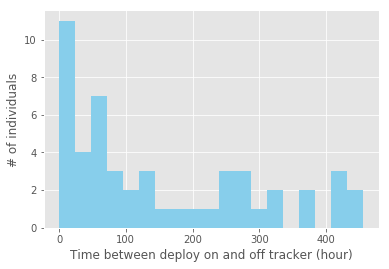

In [21]:
(whale_ref_clean['monitor-duration'] / pd.Timedelta(hours=1)).hist(bins = range(0, 480, 24), color = 'skyblue')
plt.xlabel('Time between deploy on and off tracker (hour)')
plt.ylabel('# of individuals');

Judging from the zoomed-in histogram, it seems that there are 11 + 4 + 7 = 22 whales who wore the tracker for less than 72 hours (3 days) and need to be excluded from our data. 

Although we could go ahead and remove the outliers now, it would be more efficient if we cross reference with __`outliers`__ in the data table. To accomplish this, we need to merge the two tables into a big one using __`pd.merge`__.

In [22]:
whale = pd.merge(whale_data_clean,
                 whale_ref_clean[['animal-id', 'deploy-on-date', 'deploy-off-date', 
                                  'monitor-duration', 'deploy-on-latitude', 
                                  'deploy-on-longitude', 'study-site']],
                 on='animal-id')
whale = whale[['animal-id', 'timestamp', 'location-lat', 'location-long', 'outlier',
               'deploy-on-date', 'deploy-off-date', 'monitor-duration', 'deploy-on-latitude', 
               'deploy-on-longitude', 'study-site', 'sensor-type', 'argos:best-level', 
               'argos:calcul-freq','argos:no-mes-rec', 'argos:no-mes-rec-120']]
whale.head()

,animal-id,timestamp,location-lat,location-long,outlier,deploy-on-date,deploy-off-date,monitor-duration,deploy-on-latitude,deploy-on-longitude,study-site,sensor-type,argos:best-level,argos:calcul-freq,argos:no-mes-rec,argos:no-mes-rec-120
0,1993CA-Bmu-00834,1993-08-29 01:13:00.000,37.058,-122.433,NaN,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,37.058,-122.433,"Pt. Ano Nuevo, CA",gps,NaN,NaN,NaN,NaN
1,1993CA-Bmu-00834,1993-08-29 01:23:17.000,36.981,-122.407,NaN,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,37.058,-122.433,"Pt. Ano Nuevo, CA",argos-doppler-shift,-126.0,4.016497e+08,4.0,0.0
2,1993CA-Bmu-00834,1993-08-31 13:04:34.000,37.637,-122.788,NaN,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,37.058,-122.433,"Pt. Ano Nuevo, CA",argos-doppler-shift,-126.0,6.496602e+05,2.0,0.0
3,1993CA-Bmu-00834,1993-09-01 01:57:39.000,37.166,-122.827,NaN,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,37.058,-122.433,"Pt. Ano Nuevo, CA",argos-doppler-shift,-129.0,6.496602e+05,2.0,0.0
4,1993CA-Bmu-00834,1993-09-05 13:41:06.000,38.231,-122.747,True,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,37.058,-122.433,"Pt. Ano Nuevo, CA",argos-doppler-shift,-129.0,6.496602e+05,2.0,0.0


Once we have a merge table, we can select records that are 1) not marked an outlier, and 2) not from an whale wearing tracker for less than 3 days

In [23]:
whale_clean = whale.loc[(whale['outlier'] != True) 
                        & ((whale['monitor-duration']/pd.Timedelta(hours=1)) > 72)]
whale_clean.head()

,animal-id,timestamp,location-lat,location-long,outlier,deploy-on-date,deploy-off-date,monitor-duration,deploy-on-latitude,deploy-on-longitude,study-site,sensor-type,argos:best-level,argos:calcul-freq,argos:no-mes-rec,argos:no-mes-rec-120
0,1993CA-Bmu-00834,1993-08-29 01:13:00.000,37.058,-122.433,NaN,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,37.058,-122.433,"Pt. Ano Nuevo, CA",gps,NaN,NaN,NaN,NaN
1,1993CA-Bmu-00834,1993-08-29 01:23:17.000,36.981,-122.407,NaN,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,37.058,-122.433,"Pt. Ano Nuevo, CA",argos-doppler-shift,-126.0,4.016497e+08,4.0,0.0
2,1993CA-Bmu-00834,1993-08-31 13:04:34.000,37.637,-122.788,NaN,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,37.058,-122.433,"Pt. Ano Nuevo, CA",argos-doppler-shift,-126.0,6.496602e+05,2.0,0.0
3,1993CA-Bmu-00834,1993-09-01 01:57:39.000,37.166,-122.827,NaN,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,37.058,-122.433,"Pt. Ano Nuevo, CA",argos-doppler-shift,-129.0,6.496602e+05,2.0,0.0
5,1993CA-Bmu-10823,1993-08-28 18:20:00.000,37.012,-122.412,NaN,1993-08-28 18:20:00,1993-09-01 22:35:12,4 days 04:15:12,37.012,-122.412,"Pt. Ano Nuevo, CA",gps,NaN,NaN,NaN,NaN


In [24]:
whale_clean.shape

(15667, 16)

## Part 2: Visualization

### Different visualization attempts (and 3rd-Degree Clean-up, if needed)

Now that we have cleaned records, we can do some basic manipulations to visualize the records. 

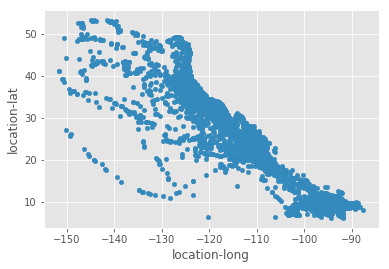

In [25]:
whale_clean.plot.scatter(x='location-long', y='location-lat')

To visualize the location records as points on a world map, let's draw a special scatter plot using __GeoPandas__. __GeoPandas__ extends the __Pandas__ package and allows for data analayis in the spatial and geometric setting. To install this package, use either __Anaconda Navigator__ or clone from its GitHub repo. Refer to the [official installation guide][1].

[1]: http://geopandas.org/install.html

***UPDATE: GEOPANDA IMPORT CONTINUED TO FAIL, POSTED ISSUE ON [GITHUB][1]*** 
[1]: https://github.com/conda-forge/geopandas-feedstock/issues/51

***UPDATE TO PREVIOUS UPDATE: A FIX WILL BE DONE SOON TO MY PROBLEM***

xxxxxxxx SKIP geopanda section for now xxxxxxxx

It would also be cool to see how many movement data were recorded each year. First let's change __`timestamp`__ column into type __`pd.datetime`__ as well.

In [26]:
whale_clean.dtypes

animal-id                        object
timestamp                        object
location-lat                    float64
location-long                   float64
outlier                          object
deploy-on-date           datetime64[ns]
deploy-off-date          datetime64[ns]
monitor-duration        timedelta64[ns]
deploy-on-latitude              float64
deploy-on-longitude             float64
study-site                       object
sensor-type                      object
argos:best-level                float64
argos:calcul-freq               float64
argos:no-mes-rec                float64
argos:no-mes-rec-120            float64
dtype: object

In [27]:
whale_clean['timestamp'] = pd.to_datetime(whale_clean['timestamp'])
whale_clean.dtypes

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


animal-id                        object
timestamp                datetime64[ns]
location-lat                    float64
location-long                   float64
outlier                          object
deploy-on-date           datetime64[ns]
deploy-off-date          datetime64[ns]
monitor-duration        timedelta64[ns]
deploy-on-latitude              float64
deploy-on-longitude             float64
study-site                       object
sensor-type                      object
argos:best-level                float64
argos:calcul-freq               float64
argos:no-mes-rec                float64
argos:no-mes-rec-120            float64
dtype: object

Now let's plot a histogram with respect to year.

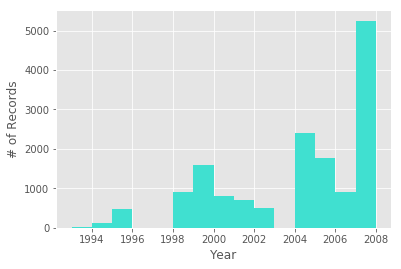

In [28]:
whale_clean['timestamp'].dt.year.hist(bins = range(1993,2009,1), color = 'turquoise')
plt.xlabel('Year')
plt.ylabel('# of Records');

Note that there are no data recorded 1997-1998 and 2003, is it because they were removed as outliers? Let's do the same histogram from the uncleaned whale table and compare.

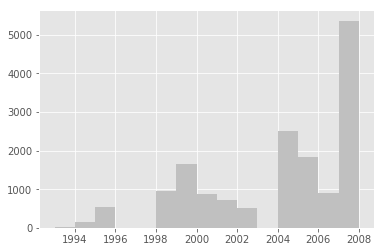

In [29]:
pd.to_datetime(whale['timestamp']).dt.year.hist(bins = range(1993,2009,1), color = 'silver')

There were no records 1997-1998 and 2003 in the original table either! May be the study had to pause for some reason during those years (funding, personnel change, etc). <br> Now let's check out the trend of collecting movement throughout the year.

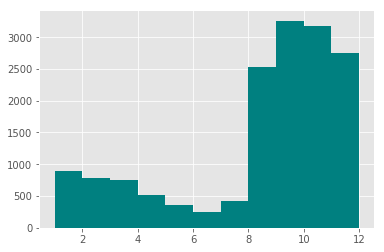

In [30]:
whale_clean['timestamp'].dt.month.hist(bins = range(1,13,1), color = 'teal')

It seems that most of the records are collected from August to December, which corresponds to the migration season of blue whales.

### Tentative Subtitude Visualization Methods

Since I cannot get GeoPandas to work (despite a lot of efforts), we can seek other ways to disect and visualize our table. We can visualize individual's migration record as a series of scatter plots to get an rough idea of their migration pattern. <br> <br>
To do so, I would like to import __`seaborn`__, which does a better job in making multiple subgraphs than __`matplotlib`__.

In [31]:
import seaborn as sns
sns.set(style="darkgrid")

First, let's produce a migration scatter plot for each individual in our __`whale_clean`__ table before focusing on any particular individual.

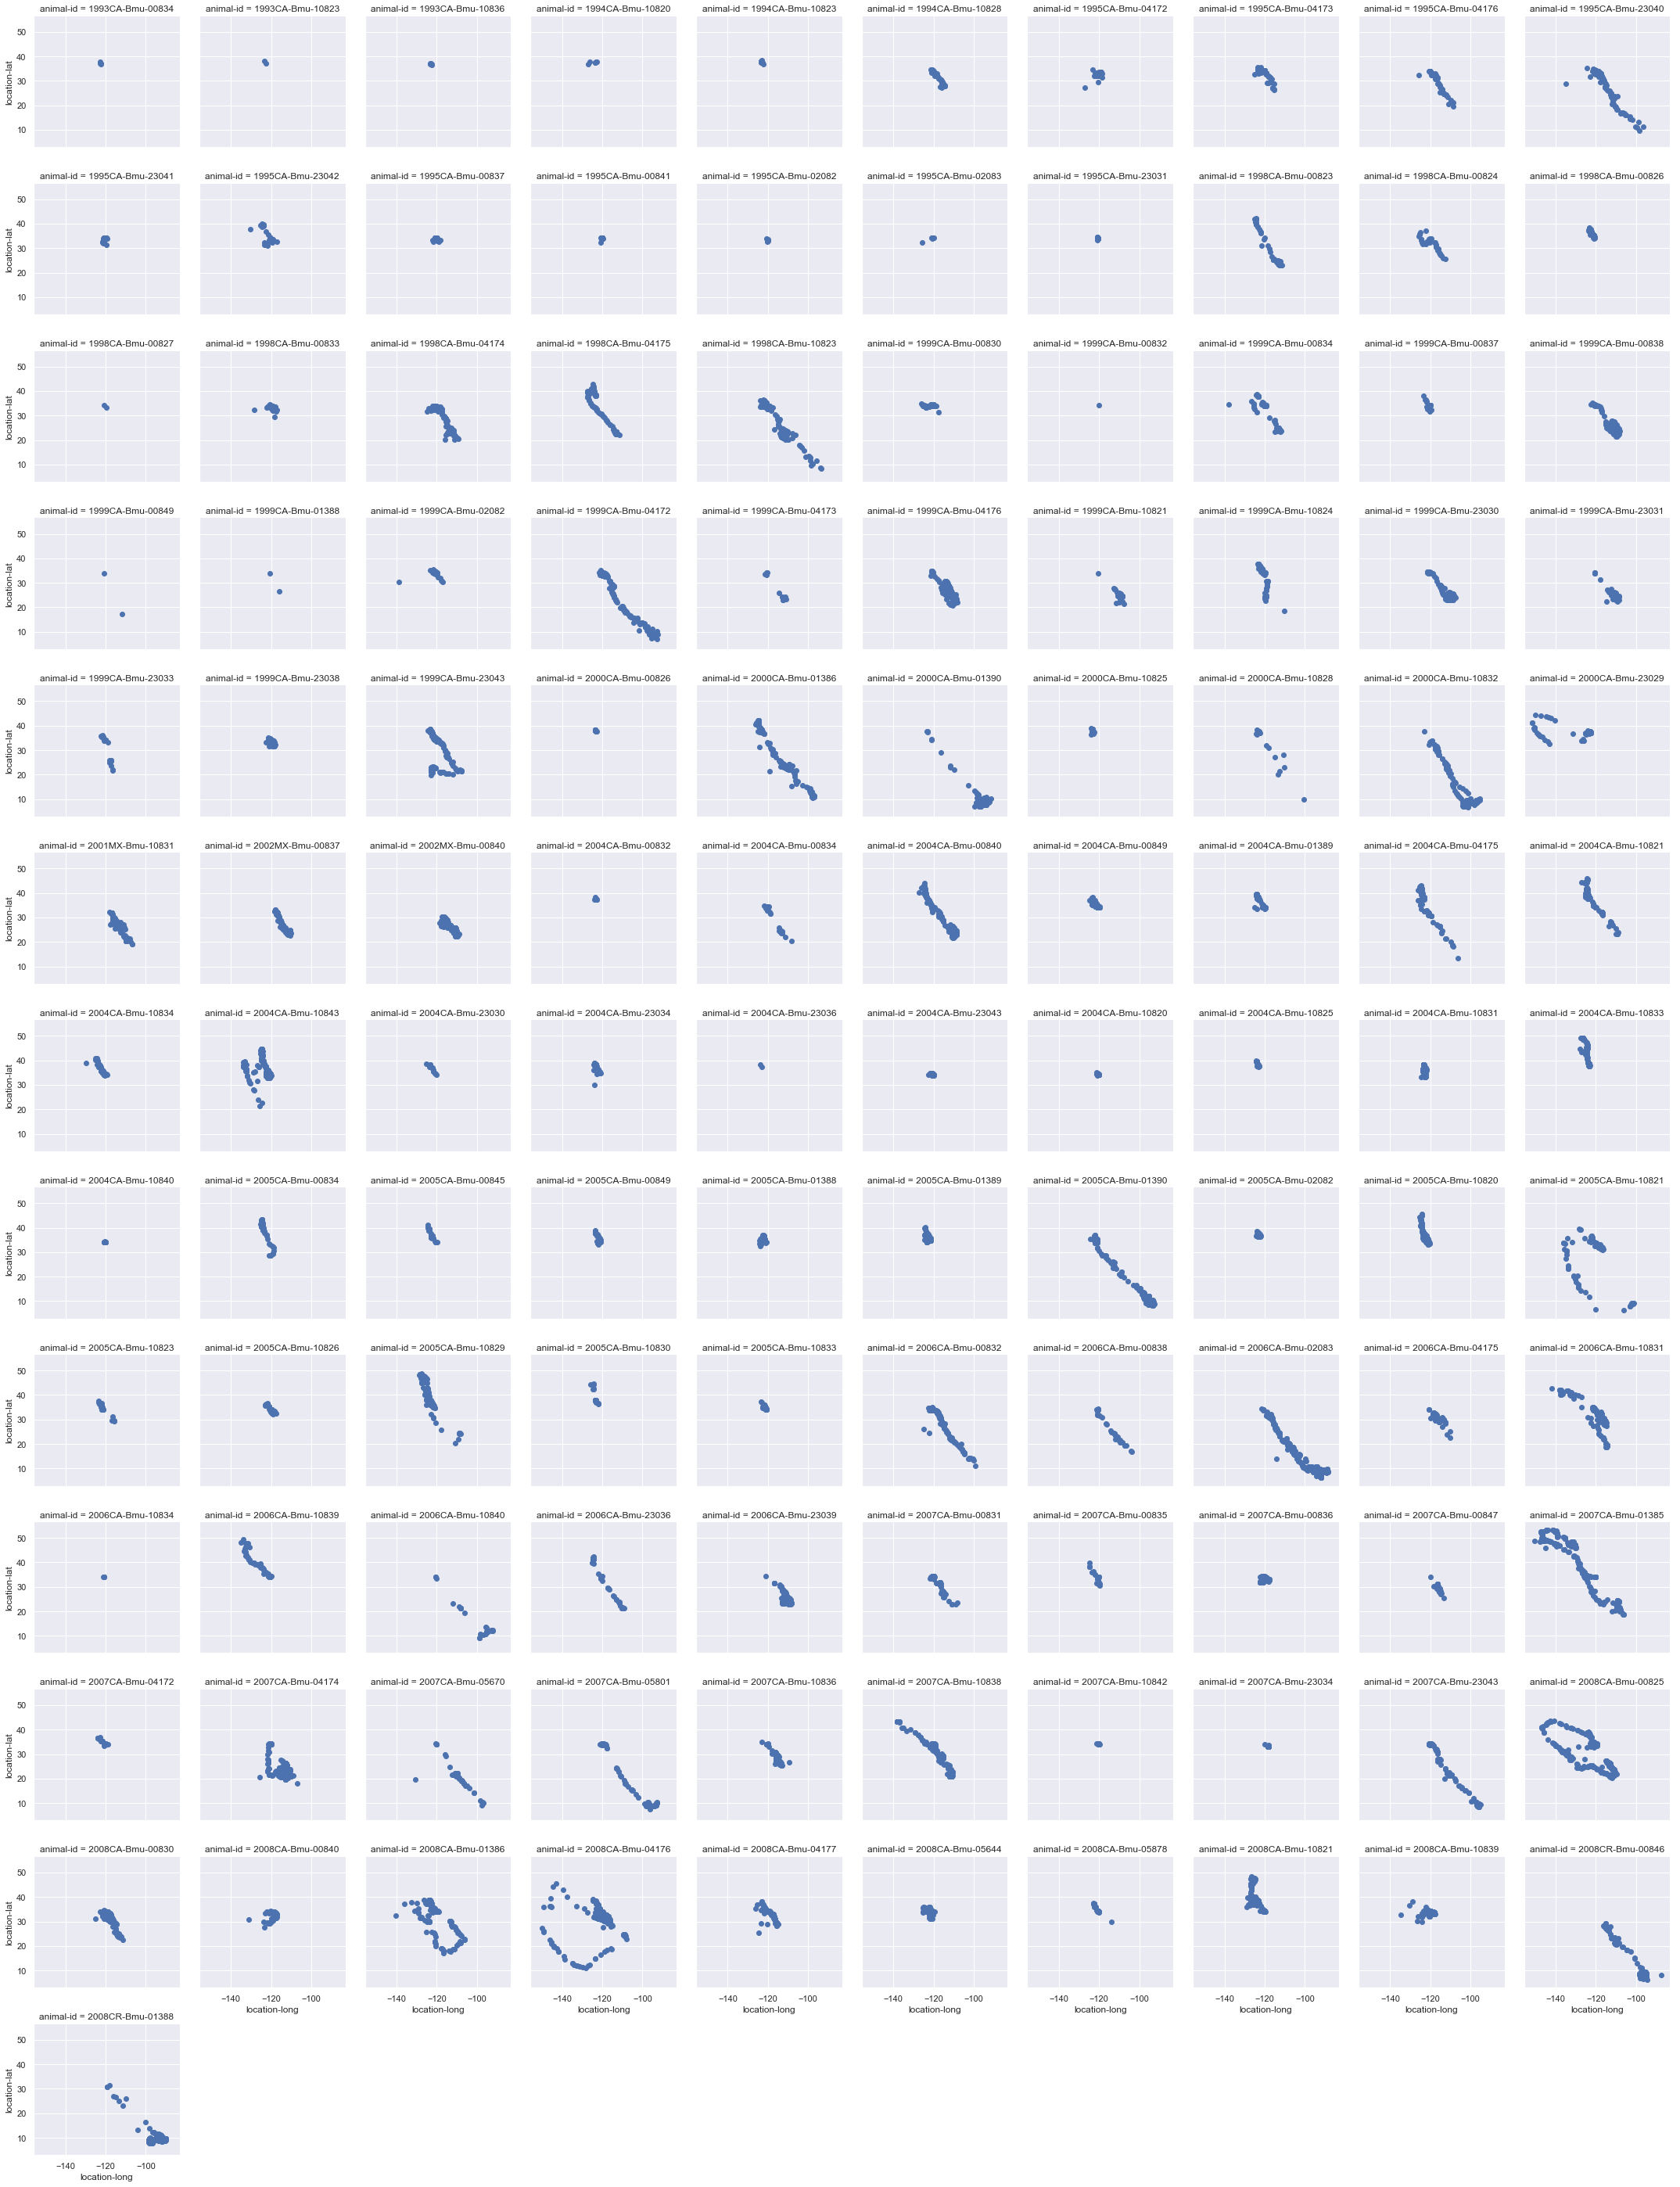

In [32]:
id_grid = sns.FacetGrid(whale_clean, col="animal-id", col_wrap=10)
id_grid.map(plt.scatter, "location-long", "location-lat")

We can also visualize multi-variable scatter plot for individuals with respect to the study site they belong to. In addition to using __`seaborn.FacetGrid`__, we will set the __col__ variable to __"study-site"__ to distinguish subset and __hue__ variable to __"animal-id"__ to distinguish between each indiviudal.

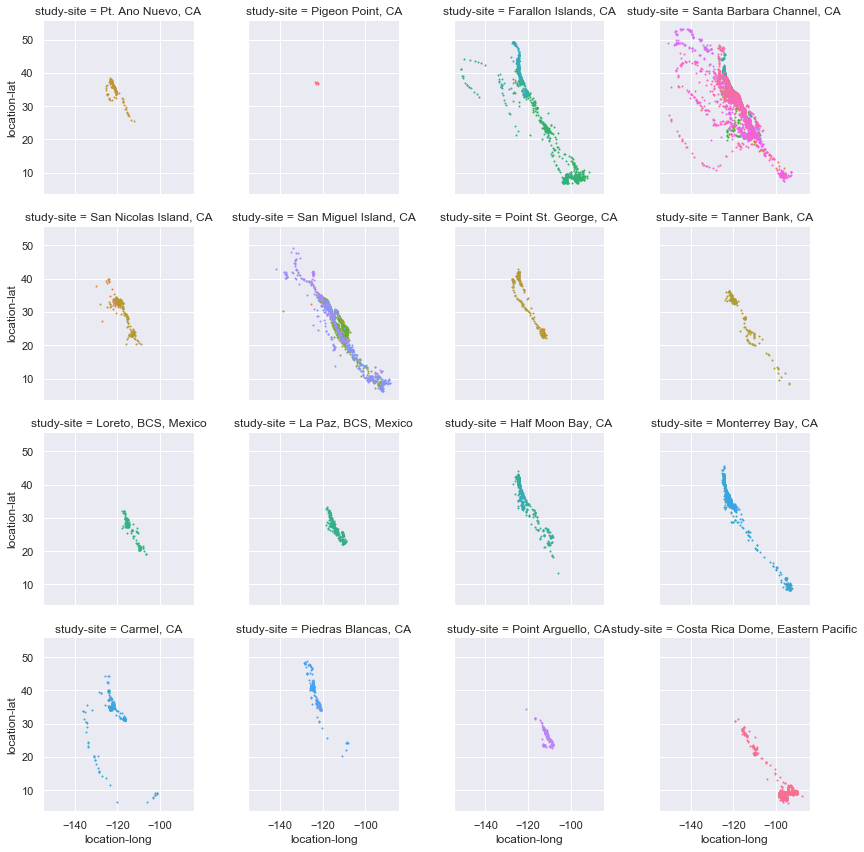

In [33]:
ss_grid = sns.FacetGrid(whale_clean, col="study-site",hue="animal-id",col_wrap=4)
ss_grid.map(plt.scatter, "location-long", "location-lat", s=1)

It looks like Santa Barbara Channel and San Miguel Island had most number of individuals. Let's look more closely at them

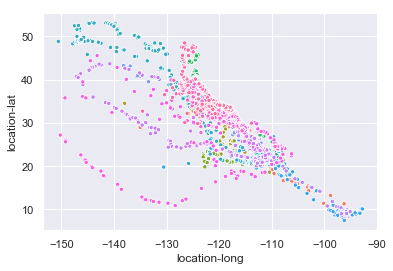

In [34]:
sbc_whale = whale_clean.loc[lambda whale_clean: whale_clean['study-site'] == 'Santa Barbara Channel, CA']
sns.scatterplot( x='location-long', y='location-lat', hue='animal-id',data=sbc_whale, legend=False, size = 0)

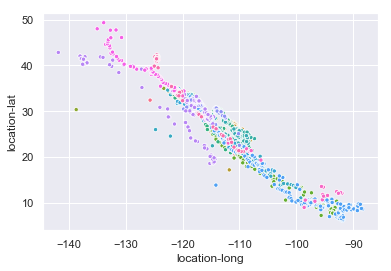

In [35]:
sml_whale = whale_clean.loc[lambda whale_clean: whale_clean['study-site'] == 'San Miguel Island, CA']
sns.scatterplot( x='location-long', y='location-lat', hue='animal-id',data=sml_whale, legend=False, size = 0)

### How far did each whale travel?

From the two graphs above, we can tell from the color dots distribution that some whales traveled further than others. It would be really cool if we can actually calculate __the distance that each whale traveled__ based on each pair of latitude and longitude recorded.

In [36]:
def travelDis(lat, long): 
    # use Haversine formula to calculate distance between two points on earth given lat and long
    # https://en.wikipedia.org/wiki/Haversine_formula
    # radius of earth is 6317
    R = 6371
    dlat1 = np.deg2rad(lat[0:lat.size-1])
    dlat2 = np.deg2rad(lat[1:lat.size])
    dlat = np.deg2rad(np.diff(lat))
    dlong = np.deg2rad(np.diff(long))
    a = np.sin(dlat/2)**2 + np.cos(dlat2) * np.cos(dlat1) * np.sin(dlong/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d.sum()

The function above take two arrays of lattitude and longitude and return the sum of distances between each sets of coordinate. This is of course not quite accurate, as the time interval between adjacent records are quite long. And maybe some fast-swimmers like to wander around a little bit or dance in circles, and there is no way we can account for that! But we can think of this as "shortest possible distance traveled".

In [37]:
animal_id = whale_clean['animal-id'].unique()
travel_dis = [];
for i in np.arange(animal_id.size):
    df = whale_clean.loc[lambda whale_clean: whale_clean['animal-id'] == animal_id[i]];
    lat = df['location-lat'].__array__()
    long = df['location-long'].__array__()
    dis = travelDis(lat, long)
    travel_dis.append(dis)

id_vs_dis = pd.DataFrame({'animal-id':animal_id, 'travel-dis':travel_dis})
id_vs_dis.head(10)

,animal-id,travel-dis
0,1993CA-Bmu-00834,141.704316
1,1993CA-Bmu-10823,160.016183
2,1993CA-Bmu-10836,274.335325
3,1994CA-Bmu-10820,466.977983
4,1994CA-Bmu-10823,599.513332
5,1994CA-Bmu-10828,4100.276000
6,1995CA-Bmu-04172,5501.472616
7,1995CA-Bmu-04173,5714.105878
8,1995CA-Bmu-04176,5170.620218
9,1995CA-Bmu-23040,16659.234830


In [38]:
id_vs_dis.sort_values(by=['travel-dis']).head()

,animal-id,travel-dis
26,1999CA-Bmu-00832,0.000000
90,2006CA-Bmu-10834,68.472738
64,2004CA-Bmu-23036,113.061331
20,1998CA-Bmu-00827,125.695848
0,1993CA-Bmu-00834,141.704316


Note that there is a whale with travel-dis = 0. Let's go back to the original data and why that is the case.

In [39]:
whale_clean.loc[lambda whale_clean: whale_clean['animal-id'] == '1999CA-Bmu-00832']

,animal-id,timestamp,location-lat,location-long,outlier,deploy-on-date,deploy-off-date,monitor-duration,deploy-on-latitude,deploy-on-longitude,study-site,sensor-type,argos:best-level,argos:calcul-freq,argos:no-mes-rec,argos:no-mes-rec-120
1768,1999CA-Bmu-00832,1999-07-23 18:27:00,34.12,-120.11,NaN,1999-07-23 18:27:00,1999-08-06 13:57:28,13 days 19:30:28,34.12,-120.11,"Santa Barbara Channel, CA",gps,NaN,NaN,NaN,NaN


In [40]:
whale.loc[lambda whale: whale['animal-id'] == '1999CA-Bmu-00832']

,animal-id,timestamp,location-lat,location-long,outlier,deploy-on-date,deploy-off-date,monitor-duration,deploy-on-latitude,deploy-on-longitude,study-site,sensor-type,argos:best-level,argos:calcul-freq,argos:no-mes-rec,argos:no-mes-rec-120
1768,1999CA-Bmu-00832,1999-07-23 18:27:00.000,34.120,-120.110,NaN,1999-07-23 18:27:00,1999-08-06 13:57:28,13 days 19:30:28,34.12,-120.11,"Santa Barbara Channel, CA",gps,NaN,NaN,NaN,NaN
1769,1999CA-Bmu-00832,1999-08-06 13:57:28.000,33.406,-111.771,True,1999-07-23 18:27:00,1999-08-06 13:57:28,13 days 19:30:28,34.12,-120.11,"Santa Barbara Channel, CA",argos-doppler-shift,-130.0,650396.3125,6.0,0.0


Comparing the records in the original table and cleaned table, it looks like indiviudal 1999CA-Bmu-00832 had two records, one of which was marked as an outlier and deleted during clean-up. It would be best if we can simply delete the other record as well. This can be done once we merge the id_vs_dis table with the whale_clean table.

### How "fast" did each whale travel?

In the meantime, we can also calculate the approximate average distance traveled by a whale per day.

In [41]:
md = whale_clean['monitor-duration'].unique()/pd.Timedelta(days=1)
avg_dis = travel_dis / md
avg_dis

array([ 18.84487721,  38.30683987,  74.03814608,  82.39912781,
        73.84032162, 295.50996429, 292.76345602, 321.45759141,
       122.58696344, 206.66176909, 184.71739603, 408.5409441 ,
       231.46855346,  67.31660908,  24.09722346,  64.11136219,
        96.73037307,  89.2254799 ,  18.25808733,  91.79550113,
         7.29212228, 566.64930775, 271.96416238, 106.16879063,
        98.33969183, 148.21259196,   0.        ,  82.49376286,
        39.43627154,  54.28698537,  55.70142006,   3.5909045 ,
       253.11204783, 186.4269223 ,  23.23849594,  55.47324804,
        74.9108113 ,  55.19372868,  87.17079152,  51.33826943,
        78.05037124, 136.98028059,  94.15228132,  36.5291683 ,
       145.22802269,  66.20406664,  70.819719  ,  91.00239694,
        63.78214895, 112.68648805,  69.37729658,  61.68229602,
       106.7501635 ,  55.28323035,  54.29188825,  40.64675661,
        46.38425109,  42.21677792,  83.90602467,  68.13494543,
        82.94597019,  84.51991226, 105.22353539,  34.70

In [42]:
id_vs_dis['avg-dis-km-per-day'] = avg_dis
id_vs_dis.head()

,animal-id,travel-dis,avg-dis-km-per-day
0,1993CA-Bmu-00834,141.704316,18.844877
1,1993CA-Bmu-10823,160.016183,38.306840
2,1993CA-Bmu-10836,274.335325,74.038146
3,1994CA-Bmu-10820,466.977983,82.399128
4,1994CA-Bmu-10823,599.513332,73.840322


Now we can merge our calculated values back to the our cleaned table. I would also like to do a little bit of clean up, since I don't think measures related to record creduality (argos:best-level, etc) are of our best interest now. We can add them back in if need to later.

In [43]:
whale_simp = whale_clean.merge(id_vs_dis, left_on='animal-id',right_on='animal-id')
whale_simp = whale_simp[['animal-id', 'timestamp', 'location-lat', 'location-long', 
                        'deploy-on-date', 'deploy-off-date', 'monitor-duration', 
                        'travel-dis','avg-dis-km-per-day','deploy-on-latitude', 
                        'deploy-on-longitude', 'study-site']]
whale_simp.head()

,animal-id,timestamp,location-lat,location-long,deploy-on-date,deploy-off-date,monitor-duration,travel-dis,avg-dis-km-per-day,deploy-on-latitude,deploy-on-longitude,study-site
0,1993CA-Bmu-00834,1993-08-29 01:13:00,37.058,-122.433,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA"
1,1993CA-Bmu-00834,1993-08-29 01:23:17,36.981,-122.407,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA"
2,1993CA-Bmu-00834,1993-08-31 13:04:34,37.637,-122.788,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA"
3,1993CA-Bmu-00834,1993-09-01 01:57:39,37.166,-122.827,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA"
4,1993CA-Bmu-10823,1993-08-28 18:20:00,37.012,-122.412,1993-08-28 18:20:00,1993-09-01 22:35:12,4 days 04:15:12,160.016183,38.306840,37.012,-122.412,"Pt. Ano Nuevo, CA"


Now let's look at the fastest whare in the study.

In [44]:
whale_simp.groupby('animal-id').mean().sort_values('avg-dis-km-per-day',ascending=False).head(10)

,location-lat,location-long,travel-dis,avg-dis-km-per-day,deploy-on-latitude,deploy-on-longitude
animal-id,,,,,,
1998CA-Bmu-00833,32.988224,-119.269448,8952.049063,566.649308,33.192,-119.200
1995CA-Bmu-23042,34.769545,-121.440939,7577.715784,408.540944,33.310,-119.400
1995CA-Bmu-04173,32.762356,-120.116034,5714.105878,321.457591,34.159,-120.099
1994CA-Bmu-10828,31.045935,-117.669505,4100.276000,295.509964,34.236,-120.458
1995CA-Bmu-04172,32.765833,-120.366333,5501.472616,292.763456,33.374,-119.510
1998CA-Bmu-04174,28.497691,-116.496974,20188.205104,271.964162,33.196,-119.183
2008CA-Bmu-10839,33.714056,-119.956238,15618.028245,257.680618,34.135,-120.021
1999CA-Bmu-02082,33.924037,-120.698675,7753.240949,253.112048,34.053,-120.605
1995CA-Bmu-00837,33.605923,-120.128923,2360.384500,231.468553,34.154,-120.046


In [45]:
whale_simp.groupby('animal-id').mean().sort_values('travel-dis',ascending=False).head(10)

,location-lat,location-long,travel-dis,avg-dis-km-per-day,deploy-on-latitude,deploy-on-longitude
animal-id,,,,,,
2006CA-Bmu-02083,17.493938,-103.903011,26155.804637,91.071409,34.101,-120.613
2008CA-Bmu-00825,30.570005,-121.588419,25081.953511,96.551170,34.119,-120.033
2008CA-Bmu-01386,34.429262,-121.288524,22498.011770,106.019495,34.123,-120.038
2008CA-Bmu-04176,30.359093,-121.736300,21420.996480,91.614334,34.122,-120.038
2002MX-Bmu-00840,26.854198,-114.177710,20628.690710,106.750163,24.672,-110.349
2008CR-Bmu-01388,9.890040,-94.826807,20488.432193,135.157525,8.767,-96.907
2004CA-Bmu-00840,37.191000,-121.317599,20484.329110,40.646757,37.417,-123.076
1998CA-Bmu-04174,28.497691,-116.496974,20188.205104,271.964162,33.196,-119.183
2007CA-Bmu-01385,39.075710,-128.736678,18372.917580,91.176139,34.150,-120.018


Comparing the whales that swam the fastest versus the furthest, we can tell that roughtly speaking, whales documented before 2000 swam faster than those after 2000, whereas whales documented after 2000 generally swam further than those before 2000. 

### Travel Pattern by Year

To confirm that this pattern exists in a yearly basis, let us find the average of `travel-dis` and `avg-dis-km-per-day` in the whale documented per year.<br> <br>
Let us add a column named `year` in the table.

In [46]:
whale_simp['year'] = whale_simp['timestamp'].dt.year
whale_simp.head()

,animal-id,timestamp,location-lat,location-long,deploy-on-date,deploy-off-date,monitor-duration,travel-dis,avg-dis-km-per-day,deploy-on-latitude,deploy-on-longitude,study-site,year
0,1993CA-Bmu-00834,1993-08-29 01:13:00,37.058,-122.433,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA",1993
1,1993CA-Bmu-00834,1993-08-29 01:23:17,36.981,-122.407,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA",1993
2,1993CA-Bmu-00834,1993-08-31 13:04:34,37.637,-122.788,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA",1993
3,1993CA-Bmu-00834,1993-09-01 01:57:39,37.166,-122.827,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA",1993
4,1993CA-Bmu-10823,1993-08-28 18:20:00,37.012,-122.412,1993-08-28 18:20:00,1993-09-01 22:35:12,4 days 04:15:12,160.016183,38.306840,37.012,-122.412,"Pt. Ano Nuevo, CA",1993


Let us calculate the average by year using `groupby` (this function is truly amazing!).

In [47]:
whale_yr_mean = whale_simp.groupby('year').mean()
whale_yr_mean

,location-lat,location-long,travel-dis,avg-dis-km-per-day,deploy-on-latitude,deploy-on-longitude
year,,,,,,
1993,37.118667,-122.802250,211.071798,49.685172,37.120333,-122.599500
1994,32.114865,-118.617486,3525.420684,260.026174,34.801892,-120.891081
1995,31.142772,-118.258675,7707.432820,211.026157,34.030677,-120.105298
1998,31.499012,-118.587103,11550.767655,168.011018,36.472542,-121.354554
1999,31.199309,-118.078599,10573.351177,105.128317,34.164967,-120.289634
2000,28.121402,-114.435161,12728.271207,81.857843,35.488194,-121.512028
2001,18.053580,-107.114029,16923.555087,72.783226,33.364065,-118.687335
2002,27.037878,-114.237100,17731.989550,97.828565,24.670218,-110.348208
2004,37.847006,-122.848465,8169.577622,64.887026,36.061457,-121.767361


Let us now graph two bar graphs with x = `year` and y = `travel-dis` or `avg-dis-km-per-day`, respectively.

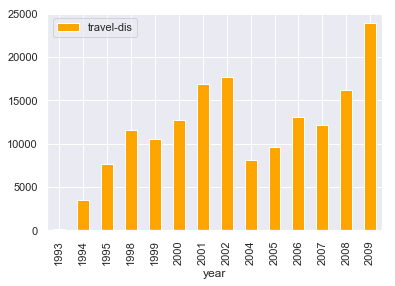

In [48]:
whale_yr_mean.plot.bar(y = 'travel-dis', color = 'orange')

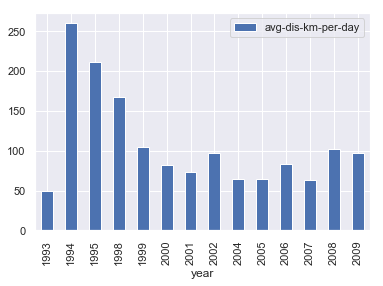

In [49]:
whale_yr_mean.plot.bar(y = 'avg-dis-km-per-day')

The two bar graphs above confirmed our speculation: travel distance increases and speed decreases. <br> __What could be some of the reasons behind these trends?__ <br> 
The decrease in average distance traveled ("speed") could be because of environmental change: whales swim slower now because the ocean has more contamination than before. And the increase in total distance traveled could be due to funding or change in experimental set-up: the research team may now have more funding to support longterm tracking. <br>
However, since almost none of the whale is tracked for more than one year, this trend found might not be very accurate.

### Travel Pattern by Month

It would also be interesting if we can find a pattern on traveling speed throughout the year, or, on a monthly basis. To do so, we cannot use the existing `avg-dis-km-per-day` because it does not represent the whale's speed at that particular moment. We will need to create a new measure that most closely represent the whale's "instantaneous speed" that the time point created. <br> <br>
The set-up goes as follows: the crude "instantaenous speed" of each whale at a time point t1 is calculated as, ___the distance it traveled between the current timestamp `t1` and the previous timestamp `t0`___ divided by __the days passed between `t1` and `t0`__. The very first timestamp recorded of each whale represent the time the whale put on the tracker, and therefore should have instantaenous speed _NaN_.

In [50]:
def instaSpeed(lat, long, t_diff): 
    # use Haversine formula to calculate distance between two points on earth given lat and long
    # https://en.wikipedia.org/wiki/Haversine_formula
    # radius of earth is 6317
    R = 6371
    dlat1 = np.deg2rad(lat[0:lat.size-1])
    dlat2 = np.deg2rad(lat[1:lat.size])
    dlat = np.deg2rad(np.diff(lat))
    dlong = np.deg2rad(np.diff(long))
    a = np.sin(dlat/2)**2 + np.cos(dlat2) * np.cos(dlat1) * np.sin(dlong/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    speed = d / t_diff
    speed0 = [float('NaN')]
    speed = np.concatenate([speed0,speed])
    return speed

Now let's implement this function on our `whale_simp` table.

In [51]:
animal_id = whale_simp['animal-id'].unique()
insta_speed = [];
for i in np.arange(animal_id.size):
    df = whale_simp.loc[lambda whale_simp: whale_simp['animal-id'] == animal_id[i]];
    lat = df['location-lat'].__array__()
    long = df['location-long'].__array__()
    t0 = df['timestamp'].__array__()[0:lat.size-1]
    t1 = df['timestamp'].__array__()[1:lat.size]
    t_diff = (t1-t0)/pd.Timedelta(hours=24)
    insta_speed_i = instaSpeed(lat, long, t_diff)
    insta_speed = np.concatenate([insta_speed, insta_speed_i])

whale_simp['insta-speed'] = insta_speed
whale_simp.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


,animal-id,timestamp,location-lat,location-long,deploy-on-date,deploy-off-date,monitor-duration,travel-dis,avg-dis-km-per-day,deploy-on-latitude,deploy-on-longitude,study-site,year,insta-speed
0,1993CA-Bmu-00834,1993-08-29 01:13:00,37.058,-122.433,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA",1993,NaN
1,1993CA-Bmu-00834,1993-08-29 01:23:17,36.981,-122.407,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA",1993,1241.767243
2,1993CA-Bmu-00834,1993-08-31 13:04:34,37.637,-122.788,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA",1993,32.308218
3,1993CA-Bmu-00834,1993-09-01 01:57:39,37.166,-122.827,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA",1993,97.764136
4,1993CA-Bmu-10823,1993-08-28 18:20:00,37.012,-122.412,1993-08-28 18:20:00,1993-09-01 22:35:12,4 days 04:15:12,160.016183,38.306840,37.012,-122.412,"Pt. Ano Nuevo, CA",1993,NaN


Let's also add a column for month.

In [52]:
whale_simp['month'] = whale_simp['timestamp'].dt.month
whale_simp.head()

,animal-id,timestamp,location-lat,location-long,deploy-on-date,deploy-off-date,monitor-duration,travel-dis,avg-dis-km-per-day,deploy-on-latitude,deploy-on-longitude,study-site,year,insta-speed,month
0,1993CA-Bmu-00834,1993-08-29 01:13:00,37.058,-122.433,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA",1993,NaN,8
1,1993CA-Bmu-00834,1993-08-29 01:23:17,36.981,-122.407,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA",1993,1241.767243,8
2,1993CA-Bmu-00834,1993-08-31 13:04:34,37.637,-122.788,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA",1993,32.308218,8
3,1993CA-Bmu-00834,1993-09-01 01:57:39,37.166,-122.827,1993-08-29 01:13:00,1993-09-05 13:41:06,7 days 12:28:06,141.704316,18.844877,37.058,-122.433,"Pt. Ano Nuevo, CA",1993,97.764136,9
4,1993CA-Bmu-10823,1993-08-28 18:20:00,37.012,-122.412,1993-08-28 18:20:00,1993-09-01 22:35:12,4 days 04:15:12,160.016183,38.306840,37.012,-122.412,"Pt. Ano Nuevo, CA",1993,NaN,8


In [53]:
whale_mth_mean = whale_simp.groupby('month').mean()
whale_mth_mean

,location-lat,location-long,travel-dis,avg-dis-km-per-day,deploy-on-latitude,deploy-on-longitude,year,insta-speed
month,,,,,,,,
1,19.888466,-108.381306,15675.849309,78.767938,31.747803,-117.942672,2005.521253,2096.795958
2,18.368637,-105.997752,16708.396318,79.151470,28.616785,-115.040678,2005.430946,4094.573676
3,18.348691,-105.137044,17132.866711,78.823974,27.859694,-114.244511,2005.504660,8318.893462
4,21.543971,-108.596282,16666.282374,74.501065,29.374216,-115.570676,2004.903922,1355.160233
5,22.961661,-110.323063,16928.364806,76.785679,28.718735,-114.808983,2004.108262,18067.096543
6,28.090385,-115.097294,17334.516908,77.434106,27.755623,-113.779782,2003.849206,15630.863076
7,31.629727,-118.277869,13874.979970,96.386241,29.819789,-115.706475,2003.287411,6378.206114
8,34.672317,-120.865977,9882.495521,100.287322,34.562186,-120.333610,2003.904120,4461.238193
9,35.610453,-121.450577,10402.570442,103.770827,34.771679,-120.573417,2003.566125,7320.362103


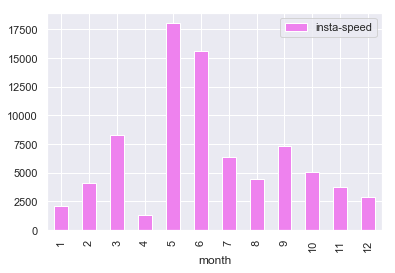

In [54]:
whale_mth_mean.plot.bar(y = 'insta-speed', color = 'violet')

According to the bar graph above, May and June seem to be the months that whales are moving the fastest, and November and December seem to be the months that whales are moving the slowest. This finding generally corresponds with blue whales' habit. They feed during the summer and mate and give birth during the winter. <br> <br>
However, recall that the data points collected in our data set are not evenly distributed throughout the year. That means there are more data collected in some months than others, and that our average of instantaneous speed collected might not be representative. Let's see the histogram of data points collected in each month again.

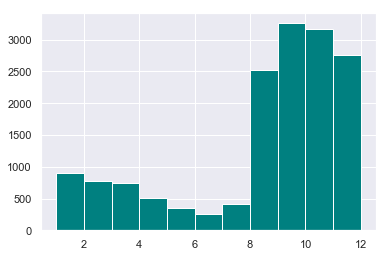

In [55]:
whale_simp['timestamp'].dt.month.hist(bins = range(1,13,1), color = 'teal')

Comparing the height of the bars in bar graph and the histograms, it looks like we have least amount of data collectd during May and June and relatively large amount of data collected during December. Could that discrepency contribute negatively to our speculation? TBC...

My next approach would be,<br>
1) __to calculate a weighted average__, so that the insta-speed average is more representative.<br>
2) __to find individuals that are monitored for over 8 month (span the duration of summer and winter)__, so that we can confirm the pattern with individual data. I am a little unsure about this approach though, because we want to work with large set data and find pattern, but not using individual data to confirm a pattern...

### After days of uninstalling conda, reinstalling geopandas, trying different ways online, I still cannot get Geopandas to work. As much as I want to experience this wonderful package, if it is not user-friendly at the installing stage, it is probably not a great package to delve into. Therefore I must seek a different route to do a geographical plot. It would be much more difficult, but it is worth a shot.

After numerous times of trying GeoPandas and failing, I decided to try a different apporach using the Mapplotlib toolkit `Basemap`. 

In [56]:
from mpl_toolkits.basemap import Basemap

In [86]:
location_long = whale_simp['location-long'].values
location_lat = whale_simp['location-lat'].values
lllon = np.min(location_long) - 3
lllat = np.min(location_lat) - 3
urlon = np.max(location_long) + 3
urlat = np.max(location_lat) + 3

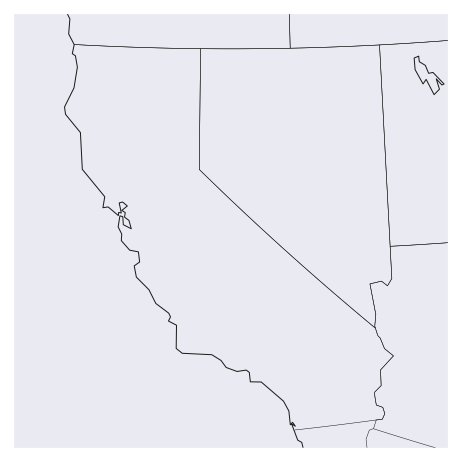

In [85]:
fig = plt.figure(figsize=(8, 8))

m = Basemap(projection='lcc', resolution='l', 
            lat_0=37.5, lon_0=-119,
            width=1.2E6, height=1.2E6)
m.drawcoastlines()
m.drawcountries()
m.drawstates()